# ¿Qué factores influyen más en el rendimiento académico de los estudiantes?

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Student_Performance_Dataset.csv')
df.head()

,Student_ID,Age,Gender,Class,Study_Hours_Per_Day,Attendance_Percentage,Parental_Education,Internet_Access,Extracurricular_Activities,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage,Performance_Level,Pass_Fail
0,S0001,15,Male,12,1.0,65,Postgraduate,No,No,40,39,72,81,50.33,Average,Pass
1,S0002,19,Female,9,1.6,58,Graduate,No,Yes,80,44,35,47,53.00,Average,Pass
2,S0003,14,Female,12,3.6,64,High School,Yes,Yes,83,73,59,58,71.67,Good,Pass
3,S0004,18,Female,9,5.5,68,Postgraduate,Yes,No,68,48,77,54,64.33,Average,Pass
4,S0005,14,Male,10,5.0,80,High School,Yes,No,41,46,36,68,41.00,Poor,Fail


In [10]:
df.describe()

,Age,Class,Study_Hours_Per_Day,Attendance_Percentage,Math_Score,Science_Score,English_Score,Previous_Year_Score,Final_Percentage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,16.508800,10.496400,3.287260,74.919800,67.754800,66.895400,67.782800,67.282200,67.477656
std,1.718637,1.106812,1.587979,14.673842,18.724487,19.141195,19.248473,16.157511,10.964081
min,14.000000,9.000000,0.500000,50.000000,35.000000,35.000000,35.000000,40.000000,36.330000
25%,15.000000,10.000000,1.900000,62.000000,52.000000,50.000000,51.000000,53.000000,59.670000
50%,17.000000,10.000000,3.300000,75.000000,68.000000,67.000000,68.000000,67.000000,67.330000
75%,18.000000,11.000000,4.700000,88.000000,84.000000,83.000000,85.000000,81.000000,75.330000
max,19.000000,12.000000,6.000000,100.000000,100.000000,100.000000,100.000000,95.000000,98.330000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Gender                      5000 non-null   object 
 3   Class                       5000 non-null   int64  
 4   Study_Hours_Per_Day         5000 non-null   float64
 5   Attendance_Percentage       5000 non-null   int64  
 6   Parental_Education          5000 non-null   object 
 7   Internet_Access             5000 non-null   object 
 8   Extracurricular_Activities  5000 non-null   object 
 9   Math_Score                  5000 non-null   int64  
 10  Science_Score               5000 non-null   int64  
 11  English_Score               5000 non-null   int64  
 12  Previous_Year_Score         5000 non-null   int64  
 13  Final_Percentage            5000 

In [13]:
df.shape

(5000, 16)

In [14]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Class', 'Study_Hours_Per_Day',
       'Attendance_Percentage', 'Parental_Education', 'Internet_Access',
       'Extracurricular_Activities', 'Math_Score', 'Science_Score',
       'English_Score', 'Previous_Year_Score', 'Final_Percentage',
       'Performance_Level', 'Pass_Fail'],
      dtype='object')

In [15]:
df.isna().sum()

Student_ID                    0
Age                           0
Gender                        0
Class                         0
Study_Hours_Per_Day           0
Attendance_Percentage         0
Parental_Education            0
Internet_Access               0
Extracurricular_Activities    0
Math_Score                    0
Science_Score                 0
English_Score                 0
Previous_Year_Score           0
Final_Percentage              0
Performance_Level             0
Pass_Fail                     0
dtype: int64

Promedio final por género

In [16]:
promedio_genero = df.groupby("Gender")["Final_Percentage"].mean().sort_values(ascending=False)
promedio_genero

Gender
Male      67.537924
Female    67.419890
Name: Final_Percentage, dtype: float64

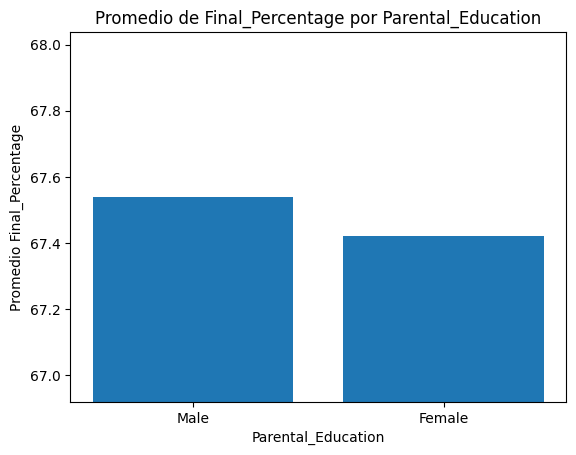

In [34]:
plt.figure()
plt.bar(promedio_genero.index.astype(str), promedio_genero.values)
plt.title("Promedio de Final_Percentage por Parental_Education")
plt.xlabel("Parental_Education")
plt.ylabel("Promedio Final_Percentage")
y_min_genero = promedio_genero.min() - 0.5
y_max_genero = promedio_genero.max() + 0.5
plt.ylim(y_min_genero, y_max_genero)

plt.show()

Promedio final por acceso a internet

In [17]:
promedio_acceso_internet = df.groupby("Internet_Access")["Final_Percentage"].mean().sort_values(ascending=False)
promedio_acceso_internet

Internet_Access
No     67.530229
Yes    67.419689
Name: Final_Percentage, dtype: float64

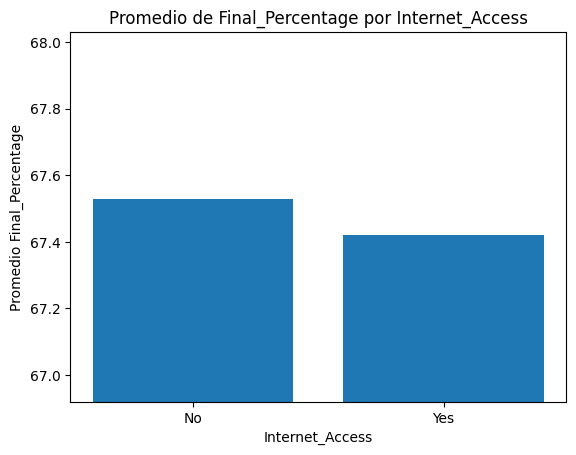

In [35]:
plt.figure()
plt.bar(promedio_acceso_internet.index.astype(str), promedio_acceso_internet.values)
plt.title("Promedio de Final_Percentage por Internet_Access")
plt.xlabel("Internet_Access")
plt.ylabel("Promedio Final_Percentage")
y_min_internet = promedio_acceso_internet.min() - 0.5
y_max_internet = promedio_acceso_internet.max() + 0.5
plt.ylim(y_min_internet, y_max_internet)
plt.show()


Promedio final por educación de los padres

In [18]:
promedio_educacion_padres = df.groupby("Parental_Education")["Final_Percentage"].mean().sort_values(ascending=False)
promedio_educacion_padres

Parental_Education
High School     67.573247
Graduate        67.451132
Postgraduate    67.409387
Name: Final_Percentage, dtype: float64

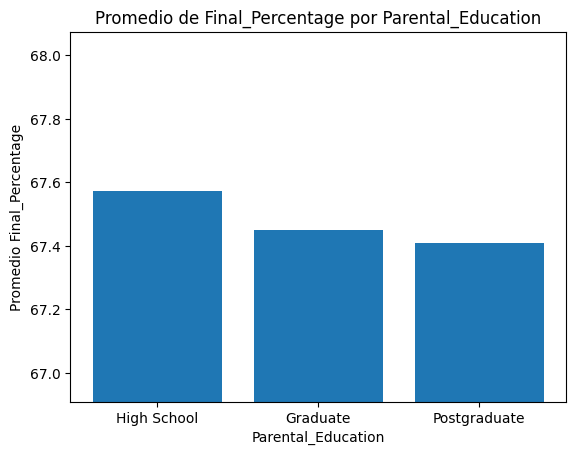

In [33]:
plt.figure()
plt.bar(promedio_educacion_padres.index.astype(str), promedio_educacion_padres.values)
plt.title("Promedio de Final_Percentage por Parental_Education")
plt.xlabel("Parental_Education")
plt.ylabel("Promedio Final_Percentage")
y_min_educacion_padres = promedio_educacion_padres.min() - 0.5
y_max_educacion_padres = promedio_educacion_padres.max() + 0.5
plt.ylim(y_min_educacion_padres, y_max_educacion_padres)

plt.show()

Promedio final por actividades extracurriculares

In [19]:
promedio_actividades_extracurriculares = df.groupby("Extracurricular_Activities")["Final_Percentage"].mean().sort_values(ascending=False)
promedio_actividades_extracurriculares

Extracurricular_Activities
Yes    67.777634
No     67.173083
Name: Final_Percentage, dtype: float64

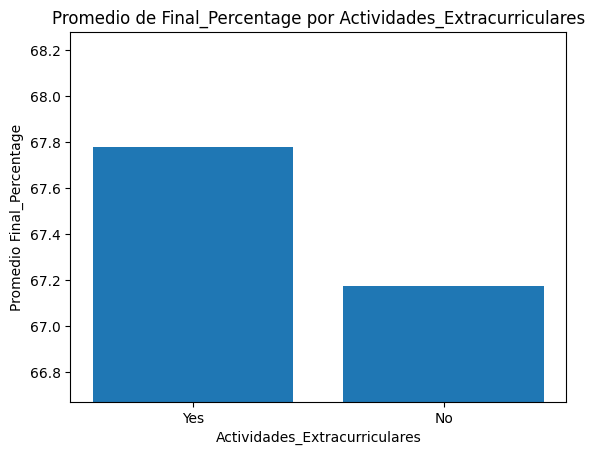

In [64]:
plt.figure()
plt.bar(promedio_actividades_extracurriculares.index.astype(str), promedio_actividades_extracurriculares.values)
plt.title("Promedio de Final_Percentage por Actividades_Extracurriculares")
plt.xlabel("Actividades_Extracurriculares")
plt.ylabel("Promedio Final_Percentage")
y_min_actividades_extracurriculares = promedio_actividades_extracurriculares.min() - 0.5
y_max_actividades_extracurriculares = promedio_actividades_extracurriculares.max() + 0.5
plt.ylim(y_min_actividades_extracurriculares, y_max_actividades_extracurriculares)

plt.show()

In [22]:
resumen = df.groupby("Internet_Access").agg(
    students=("Student_ID", "count"),
    avg_final=("Final_Percentage", "mean"),
    pass_rate=("Pass_Fail", lambda x: (x == "Pass").mean())
).sort_values("avg_final", ascending=False)
resumen

,students,avg_final,pass_rate
Internet_Access,,,
No,2622,67.530229,0.947750
Yes,2378,67.419689,0.946173


In [37]:
corr = df[["Study_Hours_Per_Day", "Attendance_Percentage", "Previous_Year_Score", "Final_Percentage"]].corr()
corr


,Study_Hours_Per_Day,Attendance_Percentage,Previous_Year_Score,Final_Percentage
Study_Hours_Per_Day,1.000000,0.026916,0.019662,-0.012958
Attendance_Percentage,0.026916,1.000000,-0.011611,0.000796
Previous_Year_Score,0.019662,-0.011611,1.000000,-0.017252
Final_Percentage,-0.012958,0.000796,-0.017252,1.000000


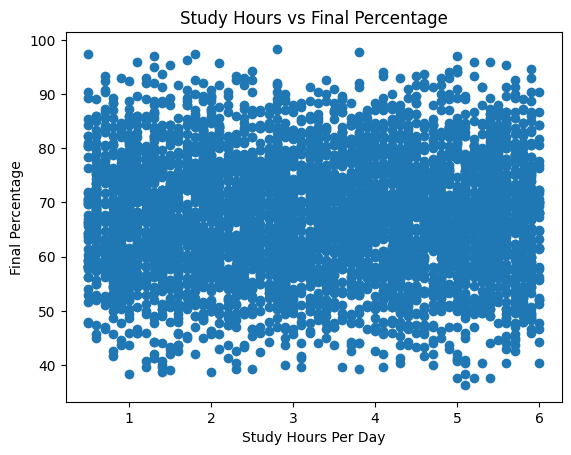

In [39]:
plt.figure()
plt.scatter(df["Study_Hours_Per_Day"], df["Final_Percentage"])
plt.title("Study Hours vs Final Percentage")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Final Percentage")
plt.show()


La gráfica de dispersión entre las horas de estudio y el porcentaje final muestra una nube de puntos sin una tendencia clara al alza o a la baja, lo que confirma la ausencia de una relación lineal significativa. Este comportamiento es consistente con el coeficiente de correlación cercano a cero obtenido previamente.

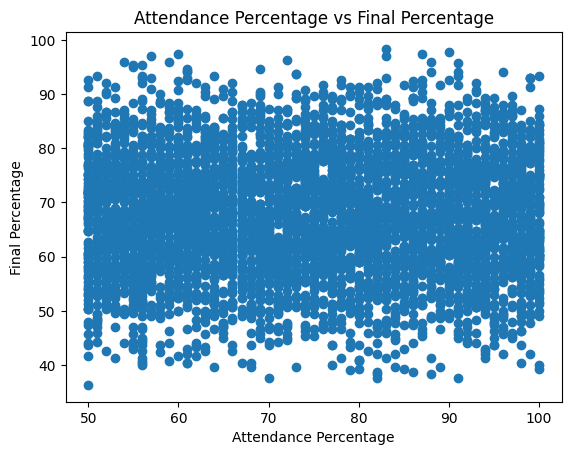

In [65]:
plt.figure()
plt.scatter(df["Attendance_Percentage"], df["Final_Percentage"])
plt.title("Attendance Percentage vs Final Percentage")
plt.xlabel("Attendance Percentage")
plt.ylabel("Final Percentage")
plt.show()


In [3]:
df["Study_Group"] = pd.qcut(df["Study_Hours_Per_Day"], q=3, labels=["Low", "Medium", "High"])

study_summary = df.groupby("Study_Group", observed=True).agg(
    students=("Student_ID", "count"),
    avg_final=("Final_Percentage", "mean"),
    pass_rate=("Pass_Fail", lambda x: (x == "Pass").mean())
)

study_summary.round({"avg_final": 2, "pass_rate": 3})


,students,avg_final,pass_rate
Study_Group,,,
Low,1739,67.50,0.947
Medium,1629,67.73,0.953
High,1632,67.20,0.941


Al segmentar a los estudiantes en grupos de bajo, medio y alto nivel de horas de estudio, no se observan diferencias significativas ni en el promedio de calificación final ni en la tasa de aprobación.
Y lo vemos en la siguiente grafica.

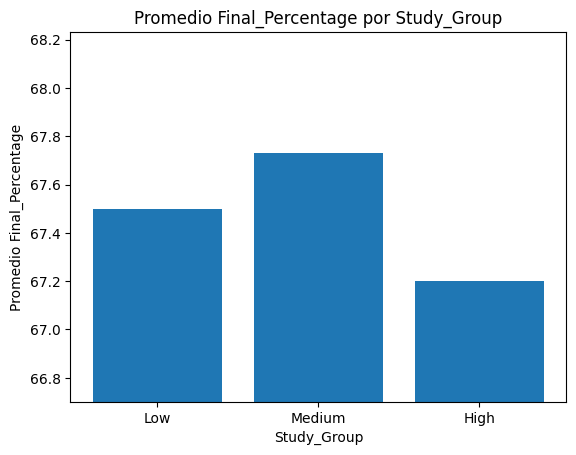

In [44]:
g = study_summary["avg_final"]

plt.figure()
plt.bar(g.index.astype(str), g.values)
plt.title("Promedio Final_Percentage por Study_Group")
plt.xlabel("Study_Group")
plt.ylabel("Promedio Final_Percentage")
y_min_study_group = g.min() - 0.5
y_max_study_group = g.max() + 0.5
plt.ylim(y_min_study_group, y_max_study_group)
plt.show()


In [46]:
def summary_by(cat_col):
    out = df.groupby(cat_col).agg(
        students=("Student_ID", "count"),
        avg_final=("Final_Percentage", "mean"),
        avg_attendance=("Attendance_Percentage", "mean"),
        avg_study=("Study_Hours_Per_Day", "mean"),
        pass_rate=("Pass_Fail", lambda x: (x == "Pass").mean())
    ).sort_values("avg_final", ascending=False)

    return out.round({"avg_final": 2, "avg_attendance": 2, "avg_study": 2, "pass_rate": 3})

display(summary_by("Internet_Access"))
display(summary_by("Parental_Education"))
display(summary_by("Extracurricular_Activities"))


,students,avg_final,avg_attendance,avg_study,pass_rate
Internet_Access,,,,,
No,2622,67.53,74.84,3.30,0.948
Yes,2378,67.42,75.01,3.27,0.946


,students,avg_final,avg_attendance,avg_study,pass_rate
Parental_Education,,,,,
High School,1660,67.57,75.58,3.30,0.949
Graduate,1661,67.45,74.69,3.28,0.949
Postgraduate,1679,67.41,74.49,3.28,0.943


,students,avg_final,avg_attendance,avg_study,pass_rate
Extracurricular_Activities,,,,,
Yes,2519,67.78,75.07,3.25,0.949
No,2481,67.17,74.76,3.32,0.945


In [48]:
def pass_table(cat_col):
    out = df.groupby(cat_col).agg(
        students=("Student_ID", "count"),
        pass_rate=("Pass_Fail", lambda x: (x == "Pass").mean())
    ).sort_values("pass_rate", ascending=False)

    return out.assign(pass_rate_pct=lambda d: (d["pass_rate"]*100).round(1))

display(pass_table("Internet_Access"))
display(pass_table("Parental_Education"))
display(pass_table("Extracurricular_Activities"))


,students,pass_rate,pass_rate_pct
Internet_Access,,,
No,2622,0.947750,94.8
Yes,2378,0.946173,94.6


,students,pass_rate,pass_rate_pct
Parental_Education,,,
Graduate,1661,0.948826,94.9
High School,1660,0.948795,94.9
Postgraduate,1679,0.943419,94.3


,students,pass_rate,pass_rate_pct
Extracurricular_Activities,,,
Yes,2519,0.949186,94.9
No,2481,0.944780,94.5


In [4]:
df["Attendance_Group"] = pd.qcut(df["Attendance_Percentage"], q=3, labels=["Low", "Medium", "High"])

internet_control = df.groupby(["Attendance_Group", "Internet_Access"], observed=True).agg(
    students=("Student_ID", "count"),
    avg_final=("Final_Percentage", "mean"),
    avg_attendance=("Attendance_Percentage", "mean"),
    pass_rate=("Pass_Fail", lambda x: (x == "Pass").mean())
).reset_index()

internet_control.round({"avg_final": 2, "pass_rate": 3, "avg_attendance": 2}).sort_values(["Attendance_Group", "avg_final"], ascending=[True, False])


,Attendance_Group,Internet_Access,students,avg_final,avg_attendance,pass_rate
0,Low,No,889,67.68,57.95,0.947
1,Low,Yes,782,67.12,58.08,0.951
2,Medium,No,853,67.73,74.96,0.947
3,Medium,Yes,822,67.45,74.97,0.948
5,High,Yes,774,67.69,92.15,0.939
4,High,No,880,67.18,91.78,0.949


In [53]:
subjects = ["Math_Score", "Science_Score", "English_Score"]

stats = df[subjects].describe().T  # T = transponer para que quede como tabla por materia
stats = stats.rename(columns={
    "mean": "mean",
    "std": "std",
    "min": "min",
    "25%": "p25",
    "50%": "median",
    "75%": "p75",
    "max": "max"
})

stats[["mean", "std", "min", "p25", "median", "p75", "max"]].round(2)


,mean,std,min,p25,median,p75,max
Math_Score,67.75,18.72,35.0,52.0,68.0,84.0,100.0
Science_Score,66.90,19.14,35.0,50.0,67.0,83.0,100.0
English_Score,67.78,19.25,35.0,51.0,68.0,85.0,100.0
